In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Obtaining our training dataset - here we load the csv which contains our training dataset and display the first 5 rows.

In [3]:
hd_data = pd.read_csv('heart_disease_train_nomissing.csv')
hd_data.head()

HeartDiseaseorAttack  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                     1       1         1          1   30       1       0   
1                     1       1         1          1   22       0       1   
2                     1       1         1          1   37       1       1   
3                     1       1         1          1   30       1       0   
4                     1       1         1          1   33       1       0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0         0             0       1  ...              1            0        5   
1         0             0       1  ...              1            0        3   
2         0             0       0  ...              1            0        5   
3         0             1       0  ...              1            0        4   
4         0             1       0  ...              1            0        3   

   MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  
0        30        30         1    0    9          5       1  
1        30         0         1    0   12          4       4  
2         0         0         1    1   10          6       5  
3        10        17         1    0    9          4       1  
4         1         0         0    1   11          6       6  

[5 rows x 22 columns]

This gives us info about the dataset and the variables, and whether there are any null entries.

In [3]:
hd_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248431 entries, 0 to 248430
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  248431 non-null  int64
 1   HighBP                248431 non-null  int64
 2   HighChol              248431 non-null  int64
 3   CholCheck             248431 non-null  int64
 4   BMI                   248431 non-null  int64
 5   Smoker                248431 non-null  int64
 6   Stroke                248431 non-null  int64
 7   Diabetes              248431 non-null  int64
 8   PhysActivity          248431 non-null  int64
 9   Fruits                248431 non-null  int64
 10  Veggies               248431 non-null  int64
 11  HvyAlcoholConsump     248431 non-null  int64
 12  AnyHealthcare         248431 non-null  int64
 13  NoDocbcCost           248431 non-null  int64
 14  GenHlth               248431 non-null  int64
 15  MentHlth              248431 non-n

The describe function provides basic statistical details about our dataset. Only columns containing numerical values are displayed but luckily all of our features are numerical values already. The 'T' following the describe function transposes the output table.

In [4]:
hd_data.describe().T

count       mean       std  min   25%   50%   75%  \
HeartDiseaseorAttack  248431.0   0.072801  0.259810  0.0   0.0   0.0   0.0   
HighBP                248431.0   0.420382  0.493621  0.0   0.0   0.0   1.0   
HighChol              248431.0   0.415149  0.492749  0.0   0.0   0.0   1.0   
CholCheck             248431.0   0.962179  0.190764  0.0   1.0   1.0   1.0   
BMI                   248431.0  27.265623  8.466858  0.0  24.0  27.0  31.0   
Smoker                248431.0   0.436194  0.495913  0.0   0.0   0.0   1.0   
Stroke                248431.0   0.037141  0.189108  0.0   0.0   0.0   0.0   
Diabetes              248431.0   0.036107  0.266289  0.0   0.0   0.0   0.0   
PhysActivity          248431.0   0.757389  0.428662  0.0   1.0   1.0   1.0   
Fruits                248431.0   0.635899  0.481178  0.0   0.0   1.0   1.0   
Veggies               248431.0   0.812866  0.390020  0.0   1.0   1.0   1.0   
HvyAlcoholConsump     248431.0   0.055673  0.229290  0.0   0.0   0.0   0.0   
AnyHealthcare         248431.0   0.949986  0.217974  0.0   1.0   1.0   1.0   
NoDocbcCost           248431.0   0.084482  0.278110  0.0   0.0   0.0   0.0   
GenHlth               248431.0   2.495377  1.058842  1.0   2.0   2.0   3.0   
MentHlth              248431.0   3.149068  7.360891  0.0   0.0   0.0   2.0   
PhysHlth              248431.0   4.127850  8.596783  0.0   0.0   0.0   3.0   
DiffWalk              248431.0   0.163498  0.369820  0.0   0.0   0.0   0.0   
Sex                   248431.0   0.424255  0.494230  0.0   0.0   0.0   1.0   
Age                   248431.0   7.951093  3.056898  1.0   6.0   8.0  10.0   
Education             248431.0   5.053331  0.985820  1.0   4.0   5.0   6.0   
Income                248431.0   6.066026  2.066602  1.0   5.0   7.0   8.0   

                       max  
HeartDiseaseorAttack   1.0  
HighBP                 1.0  
HighChol               1.0  
CholCheck              1.0  
BMI                   98.0  
Smoker                 1.0  
Stroke                 1.0  
Diabetes               2.0  
PhysActivity           1.0  
Fruits                 1.0  
Veggies                1.0  
HvyAlcoholConsump      1.0  
AnyHealthcare          1.0  
NoDocbcCost            1.0  
GenHlth                5.0  
MentHlth              30.0  
PhysHlth              30.0  
DiffWalk               1.0  
Sex                    1.0  
Age                   13.0  
Education              6.0  
Income                 8.0

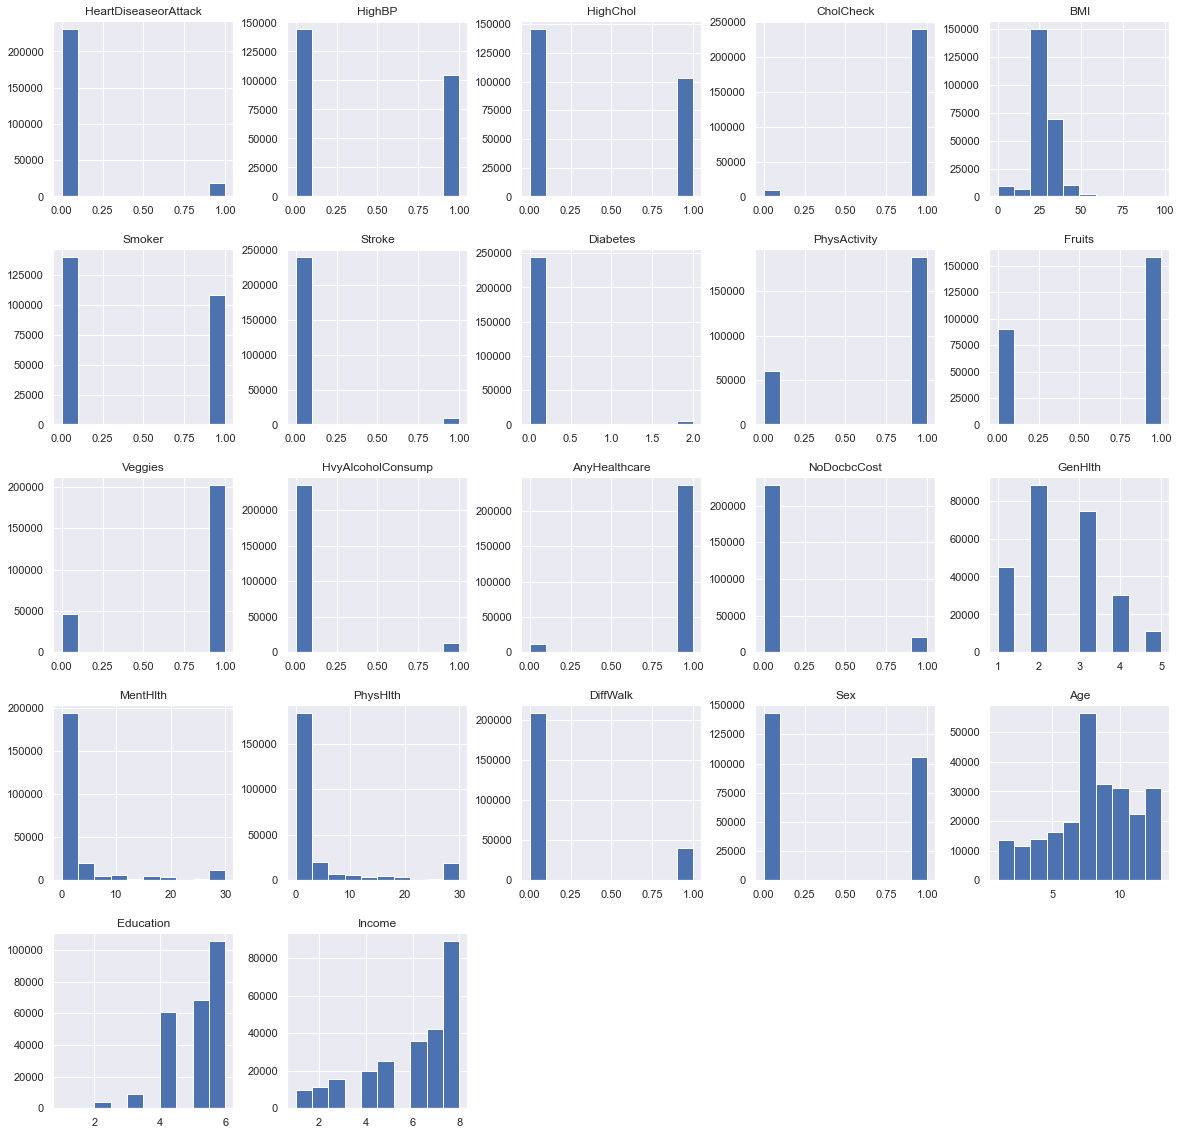

In [5]:
h = hd_data.hist(figsize = (20,20))

We are interested in the balance of the data. Below we plot a simple bar chart to illustrate class balance of heart disease patients vs non-heart disease patients in our training dataset.

0    230345
1     18086
Name: HeartDiseaseorAttack, dtype: int64


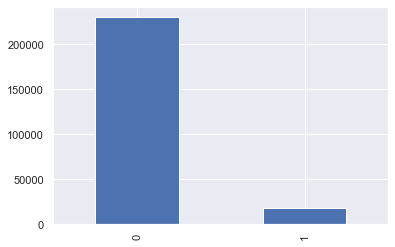

In [6]:
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = hd_data['HeartDiseaseorAttack'].map(lambda x: color_wheel.get(x + 1))
print(hd_data.HeartDiseaseorAttack.value_counts())
p=hd_data.HeartDiseaseorAttack.value_counts().plot(kind="bar")


In order to begin to visualise relationships between variables within our dataset, we can use pair plots. The scatter plots below show the relationship or lack of a relationship between each of the 22 features. As you may be able to spot, the diagonal of the matrix is made up of the histograms from above.

In [7]:
#from pd.tools.plotting import scatter_matrix
#pd.plotting.scatter_matrix(hd_data,figsize=(25, 25))
#bit long for 22 x 22


Could include pearsons coefficient or heatmap

# KNN Classification

Importance of scaling data for KNN
KNN is a distance based (typically Euclidean) supervised learning algorithm and chooses the  k closest neighburs. Based on these neighbours, it assigns the majority class.
Such distance based algorithms are affected by the scale and range of variables. The KNN algorithm is biased towards variables with smaller magnitudes, so this must be mitigated through normalisation of the features values. For each variable we use the following formula:
$ \begin{aligned}z=\frac{x-\mu}{\sigma}\end{aligned}$
\\
where $x$ is the initial value, $\mu$ is the variable mean and $\sigma$ is the variable standard deviation.

However, our KNN shall be calculating the distances using the M distance.

M distance normalises the data points whilst calculating the distance between data points. 

 The sklearn library has a built in KNeighboursClassifier function. 

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV


knn = KNeighborsClassifier()

x = hd_data.drop('HeartDiseaseorAttack')
y = hd_data['HeartDiseaseorAttack']

#20% of the training set shall be reserved for hyperparameter tuning
#x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=0.2, random_state=4)

#knn.fit(x_train,y_train)



TypeError: 'method' object is not subscriptable

Generally, KNN models are slow as they do not preprocess the data beforehand hence have a time complexity of O( 

# Hyperparameter Tuning

To improve model performance, we can tune the hyperparameters within our model. Adjusting the value of k and the leaf size can impact the model's performance. k can range from 1 to n however, if k is too small, the model will overfit. Contrastingly if k is too large, the model will underfit. We will use the grid search method to optimise our hyperparameters. Learn more about the grid search method here - https://towardsdatascience.com/gridsearch-the-ultimate-machine-learning-tool-6cd5fb93d07#:~:text=What%20is%20GridSearch%3F,of%20parameters%20for%20our%20data.